Fit a logistic regression model using the diabetes dataset and provide the confusion matrix, draw the ROC AUC chart.

Explain on the confusion matrix outcomes

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

import statsmodels.api as sm
from statsmodels.api import Logit, add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
diabetes = pd.read_csv('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Classification-Models-main/data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check shape
diabetes.shape

(768, 9)

In [4]:
# Check info
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Check missing values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values

In [6]:
# Lets check correlation
X = diabetes.drop('Outcome', axis=1)
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


**Do not see a strong correlation among variables**

In [7]:
# Lets check correlation with outcome
y = diabetes['Outcome']
X.corrwith(y)

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
dtype: float64

**Glucose seem to have better correlation with Outcome compared to others**

In [8]:
# Lets check multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

Pregnancies                  3.275748
Glucose                     16.725078
BloodPressure               14.619512
SkinThickness                4.008696
Insulin                      2.063689
BMI                         18.408884
DiabetesPedigreeFunction     3.195626
Age                         13.492985
dtype: float64

In [9]:
# Lets drop BMI
X.drop('BMI', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

Pregnancies                  3.272901
Glucose                     13.573749
BloodPressure               12.372453
SkinThickness                3.475236
Insulin                      2.033589
DiabetesPedigreeFunction     3.151598
Age                         13.381319
dtype: float64

In [10]:
# Lets drop Age and retain Glucose (Glucose has better correlation)
X.drop('Age', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

Pregnancies                  2.427151
Glucose                     11.053511
BloodPressure               10.748230
SkinThickness                3.454747
Insulin                      2.012990
DiabetesPedigreeFunction     3.121969
dtype: float64

In [11]:
# Lets drop BloodPressure and retain Glucose (Glucose has better correlation)
X.drop('BloodPressure', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

Pregnancies                 2.329116
Glucose                     5.438283
SkinThickness               3.033056
Insulin                     1.944740
DiabetesPedigreeFunction    3.090999
dtype: float64

In [12]:
# Lets remove SkinThickness as this has least correlation with Outcome
X.drop('SkinThickness', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

Pregnancies                 2.328579
Glucose                     4.917580
Insulin                     1.680622
DiabetesPedigreeFunction    2.965073
dtype: float64

**Lets fit the model with above variables as VIFs are low**

In [13]:
# Fit the model
y = diabetes['Outcome']
X = diabetes[['Pregnancies','Glucose','Insulin','DiabetesPedigreeFunction']]

X = sm.add_constant(X)
logit_model1 = sm.Logit(y,X).fit()
logit_model1.summary()

Optimization terminated successfully.
         Current function value: 0.501627
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Thu, 16 Jun 2022   Pseudo R-squ.:                  0.2244
Time:                        08:23:40   Log-Likelihood:                -385.25
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 4.271e-47
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.2395      0.477    -13.080      0.000      -7.174      -5.305
Pregnancies                  0.1277      0.026      4.870      0.000       0.076       0.179
Glucose                      0.0374      0.004     10.660      0.000       0.030       0.044
Insulin                     -0.0007      0.001     -0.882      0.378      -0.002       0.001
DiabetesPedigreeFunction     1.0322      0.279      3.698      0.000       0.485       1.579
============================================================================================
"""

In [14]:
# Drop Insulin due to high p-value and run the model again
y = diabetes['Outcome']
X = diabetes[['Pregnancies','Glucose','DiabetesPedigreeFunction']]

X = sm.add_constant(X)
logit_model2 = sm.Logit(y,X).fit()
logit_model2.summary()

Optimization terminated successfully.
         Current function value: 0.502132
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                            3
Date:                Thu, 16 Jun 2022   Pseudo R-squ.:                  0.2237
Time:                        08:23:40   Log-Likelihood:                -385.64
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 6.685e-48
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.1748      0.469    -13.152      0.000      -7.095      -5.255
Pregnancies                  0.1302      0.026      5.001      0.000       0.079       0.181
Glucose                      0.0364      0.003     10.987      0.000       0.030       0.043
DiabetesPedigreeFunction     1.0013      0.276      3.625      0.000       0.460       1.543
============================================================================================
"""

In [15]:
# Prepare X and y
y = diabetes['Outcome']
X = diabetes[['Pregnancies','Glucose','DiabetesPedigreeFunction']]

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [17]:
# Fit the model
lr = LogisticRegression()
lr_clf = lr.fit(X_train, y_train)
predicted_probas = lr.predict_proba(X_test)

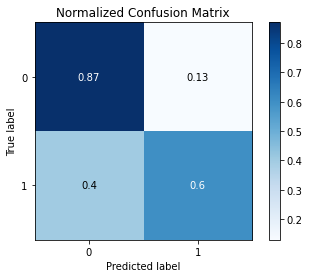

In [18]:
# Confusion matrix
predictions = cross_val_predict(lr_clf, X_test, y_test)

skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)

plt.show()

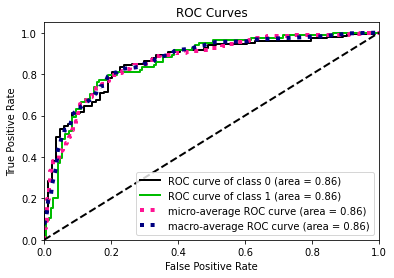

In [19]:
# Plot ROC AUC
skplt.metrics.plot_roc(y_test, predicted_probas)

plt.show()